###  Predicting the refractive index of inorganic compounds using machine learning methods


The refractive index is a crucial material property and is necessary for making material selection decisions when optical properties are important. Precise calculation of the refractive index is time-consuming and has its challenges. Many of these barriers can be overcome by implementing semi-empirical and computational methods. In this work, we utilized experimentally measured refractive index data of 235 inorganic compounds to construct a machine learning model capable of making high-accuracy predictions of refractive indexes. To predict the refractive index of inorganic materials, we examined the two regression methods, OLSR and SVR. Also, we used some of the atomic properties in addition to the band gap as a predictor to find the optimal regression method and the appropriate set of predictors.

---
###  Overview:
0. Data information 
1. Data visualization
2. Data cleaning
3. Training models
4. k-fold corss validation
5. Hypertuning paramters

In [66]:
%matplotlib inline
import time
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import sklearn.gaussian_process as gp

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

# 0. Data information 

In [2]:
materials=pd.read_csv('./Notebook/111.csv')
materials

,Material,Band_Gap(ev),Refractive_index_n,mean-z,std-z,mean_mass,std_mass,mean_ele,std_ele,mean-FIE,...,mean-radius,std-radius,mean-Den,std-Den,mean-boil,std-boil,mean-melt,std-melt,mean-con,std-con
0,Ag3AsS3,2.10,2.7290,31.71,14.35,70.674,35.132,2.244,0.302,9.089,...,124.714,35.911,6154.000,3952.450,435.416,379.037,851.410,403.809,191.516,207.174
1,Ag3SbS3,1.75,3.0130,34.28,15.88,77.365,39.494,2.225,0.309,8.921,...,127.428,35.716,6292.428,3952.075,308.967,354.119,824.807,393.209,187.802,209.894
2,AgAlGeSe4,2.02,2.8960,32.57,9.25,70.112,28.723,2.250,0.364,8.639,...,117.142,28.004,5398.428,2221.783,947.075,860.869,765.114,325.631,103.868,204.517
3,AgAlS2,3.13,2.4580,23.00,13.91,49.744,33.621,2.175,0.420,8.570,...,11.750,3.491,4277.500,3599.488,1057.543,1043.114,736.280,363.879,166.652,179.883
4,AgAlSe2,2.55,2.6630,32.00,12.18,70.192,28.731,2.160,0.406,8.266,...,122.250,25.430,5707.000,2893.796,1177.608,1010.414,789.100,313.757,166.510,179.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,ZnSnAs2,0.73,NaN,36.50,7.88,83.485,20.705,1.992,0.217,9.091,...,128.750,14.788,6476.500,750.909,444.513,442.486,844.440,254.359,71.750,28.708
266,ZnSnP2,1.66,2.9000,27.50,14.36,61.511,35.888,1.997,0.221,9.428,...,120.750,22.774,4524.000,2701.668,277.813,275.786,458.090,155.631,46.868,50.256
267,ZnTe,2.30,2.9620,41.00,11.00,96.495,31.104,1.875,0.225,9.202,...,132.500,9.500,6690.000,450.000,1.220,0.040,707.670,14.990,61.500,58.500
268,ZrO2,5.00,2.1226,18.66,15.08,41.074,35.461,2.736,0.994,11.290,...,100.666,74.481,2171.286,3068.641,61.693,40.313,745.866,977.315,7.684,10.829


In [3]:
materials.describe()

,Band_Gap(ev),Refractive_index_n,mean-z,std-z,mean_mass,std_mass,mean_ele,std_ele,mean-FIE,std_FIE,...,mean-radius,std-radius,mean-Den,std-Den,mean-boil,std-boil,mean-melt,std-melt,mean-con,std-con
count,241.000000,265.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,267.000000,267.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,3.850556,3.069600,27.033507,13.206978,62.534593,33.340224,2.424996,0.673526,10.043681,2.677451,...,112.569097,45.505940,3691.642699,2515.670525,697.875778,665.516866,618.415978,442.988786,50.962560,59.558172
std,2.598883,10.880321,13.033741,9.386806,32.254360,24.523152,0.380105,0.390632,1.622842,1.534852,...,26.326522,26.260591,2318.059880,1687.748321,644.916267,606.977820,383.698202,341.632768,51.825912,61.190572
min,0.080000,1.326000,4.000000,0.000000,9.585000,0.000000,1.525000,0.000000,7.172000,0.000000,...,11.750000,0.000000,1.583000,0.000000,1.150500,0.000000,56.967000,0.000000,0.120000,0.000000
25%,1.900000,1.814000,16.950000,6.180000,37.170750,14.449500,2.124500,0.329750,8.637250,1.564500,...,91.964000,25.063000,1786.064250,1196.977000,230.067000,164.732000,374.159750,170.764000,12.907250,14.228500
50%,3.250000,2.242000,26.500000,11.040000,60.464500,27.843000,2.445000,0.689500,10.118500,2.638000,...,115.750000,41.012000,3470.056500,2257.153000,548.531000,472.777000,605.368500,369.459000,32.345000,35.648500
75%,5.400000,2.788000,35.187500,19.802500,80.925500,49.925500,2.689250,0.990500,11.038500,3.723750,...,126.125000,65.326000,5616.142750,3516.263750,1012.258750,1030.553250,759.239750,613.191500,70.026250,79.778250
max,13.600000,179.000000,67.000000,38.650000,167.399000,101.841000,3.514000,1.594000,14.612000,8.852000,...,206.500000,128.000000,11614.666000,9187.674000,4201.400000,2548.253000,3915.000000,1576.252000,266.675000,214.995000


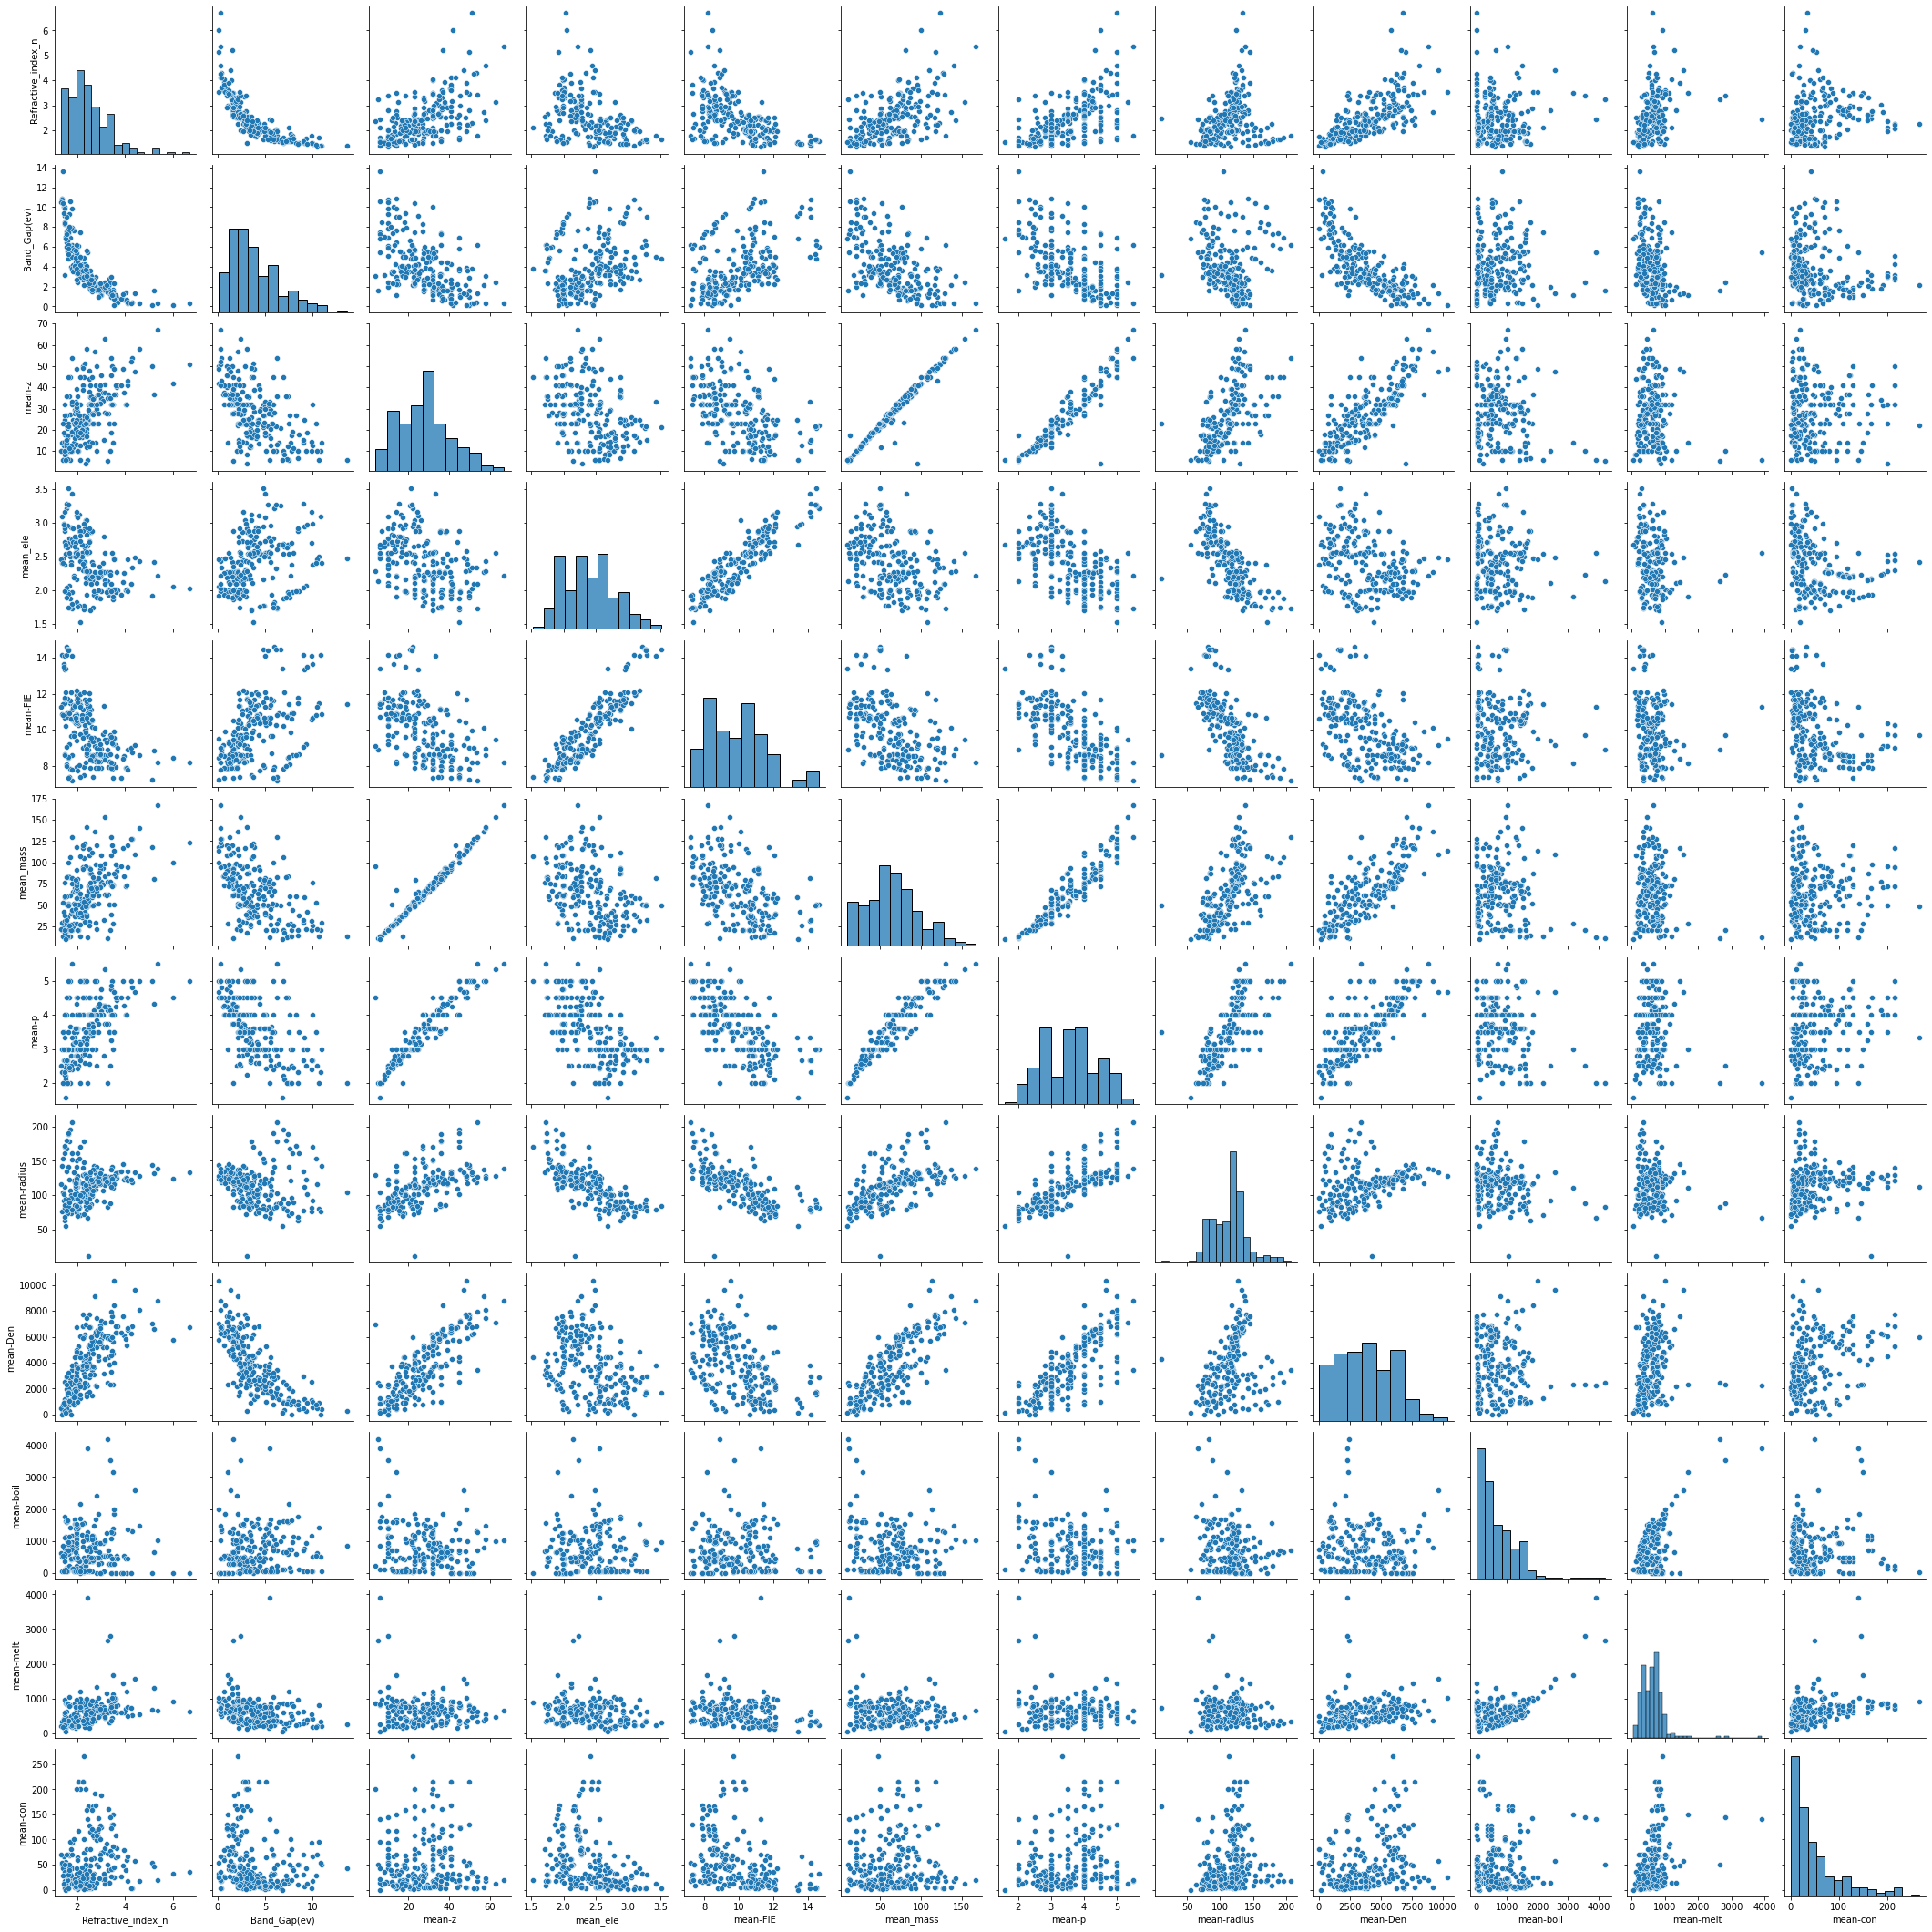

In [4]:
selected_columns = ['Refractive_index_n','Band_Gap(ev)','mean-z','mean_ele','mean-FIE',
         'mean_mass','mean-p','mean-radius', 'mean-Den',
         'mean-boil', 'mean-melt','mean-con']
sns.pairplot(materials[selected_columns].dropna())

In [4]:
MaterialName = materials.Material
materials.rename(index=MaterialName, inplace=True)
materials.drop('Material', axis=1, inplace=True)
materials

,Band_Gap(ev),Refractive_index_n,mean-z,std-z,mean_mass,std_mass,mean_ele,std_ele,mean-FIE,std_FIE,...,mean-radius,std-radius,mean-Den,std-Den,mean-boil,std-boil,mean-melt,std-melt,mean-con,std-con
Ag3AsS3,2.10,2.7290,31.71,14.35,70.674,35.132,2.244,0.302,9.089,1.322,...,124.714,35.911,6154.000,3952.450,435.416,379.037,851.410,403.809,191.516,207.174
Ag3SbS3,1.75,3.0130,34.28,15.88,77.365,39.494,2.225,0.309,8.921,1.293,...,127.428,35.716,6292.428,3952.075,308.967,354.119,824.807,393.209,187.802,209.894
AgAlGeSe4,2.02,2.8960,32.57,9.25,70.112,28.723,2.250,0.364,8.639,1.704,...,117.142,28.004,5398.428,2221.783,947.075,860.869,765.114,325.631,103.868,204.517
AgAlS2,3.13,2.4580,23.00,13.91,49.744,33.621,2.175,0.420,8.570,1.876,...,11.750,3.491,4277.500,3599.488,1057.543,1043.114,736.280,363.879,166.652,179.883
AgAlSe2,2.55,2.6630,32.00,12.18,70.192,28.731,2.160,0.406,8.266,1.589,...,122.250,25.430,5707.000,2893.796,1177.608,1010.414,789.100,313.757,166.510,179.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZnSnAs2,0.73,NaN,36.50,7.88,83.485,20.705,1.992,0.217,9.091,1.023,...,128.750,14.788,6476.500,750.909,444.513,442.486,844.440,254.359,71.750,28.708
ZnSnP2,1.66,2.9000,27.50,14.36,61.511,35.888,1.997,0.221,9.428,1.283,...,120.750,22.774,4524.000,2701.668,277.813,275.786,458.090,155.631,46.868,50.256
ZnTe,2.30,2.9620,41.00,11.00,96.495,31.104,1.875,0.225,9.202,0.192,...,132.500,9.500,6690.000,450.000,1.220,0.040,707.670,14.990,61.500,58.500
ZrO2,5.00,2.1226,18.66,15.08,41.074,35.461,2.736,0.994,11.290,3.292,...,100.666,74.481,2171.286,3068.641,61.693,40.313,745.866,977.315,7.684,10.829


In [5]:
Gap_RIndex = materials[["Band_Gap(ev)","Refractive_index_n"]]
Gap_RIndex.isnull().sum()

Band_Gap(ev)          29
Refractive_index_n     5
dtype: int64

We notice 5 raws include NaN for refractive index. Let's not inculde them in our analysis. Also, 29 enteris include NaN for band gap and we replace them the mean.

In [6]:
Gap_RIndex = Gap_RIndex[Gap_RIndex["Refractive_index_n"].notna()]
Gap_RIndex = Gap_RIndex[Gap_RIndex["Band_Gap(ev)"].notna()]
Gap_RIndex.isnull().sum()

Band_Gap(ev)          0
Refractive_index_n    0
dtype: int64

In [7]:
Gap_RIndex.describe()

,Band_Gap(ev),Refractive_index_n
count,236.000000,236.000000
mean,3.914932,2.469981
std,2.584117,0.852700
min,0.100000,1.326000
25%,2.000000,1.898575
50%,3.305000,2.310350
75%,5.420000,2.897000
max,13.600000,6.700000


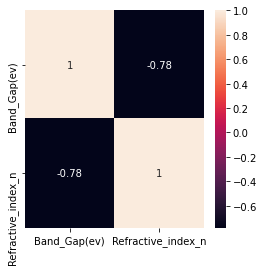

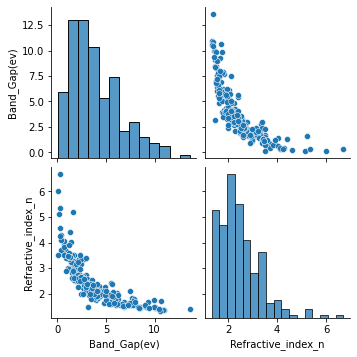

In [54]:
correlation_matrix = Gap_RIndex.corr()
fig, ax = plt.subplots(1,1,figsize=(4,4))
sns.heatmap(data=correlation_matrix,annot=True)
sns.pairplot(Gap_RIndex)

Clearly, refractive index ($n_r$) is anti-correlated with band gap ($\Delta$). This could suggest that RI dependence on band gap is of the form:

$$ n \approx \Delta^{-1} $$

Therefore, I would like to check correlation between $n_r$ and $\Delta^-1$.

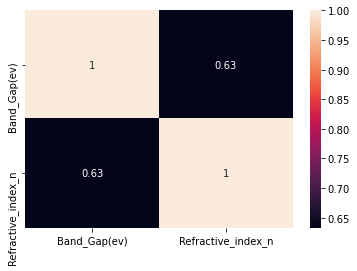

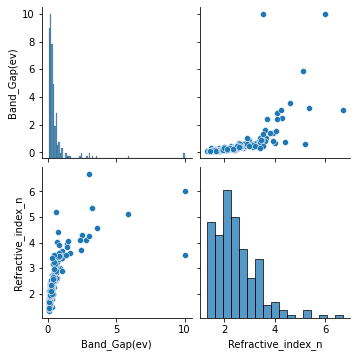

In [12]:
X = Gap_RIndex['Band_Gap(ev)']
X_1 = Gap_RIndex['Band_Gap(ev)']**-1
y = Gap_RIndex['Refractive_index_n']
NewData = pd.concat([X_1,y],axis=1)
correlation_matrix = NewData.corr()
sns.heatmap(data=correlation_matrix,annot=True)
sns.pairplot(NewData)

<ipython-input-61-69947dc7c193>:17: RuntimeWarning: invalid value encountered in reciprocal
  prediction = model_LR.predict(X_test.to_numpy().reshape(-1,1)**-1)
<ipython-input-61-69947dc7c193>:17: RuntimeWarning: invalid value encountered in reciprocal
  prediction = model_LR.predict(X_test.to_numpy().reshape(-1,1)**-1)


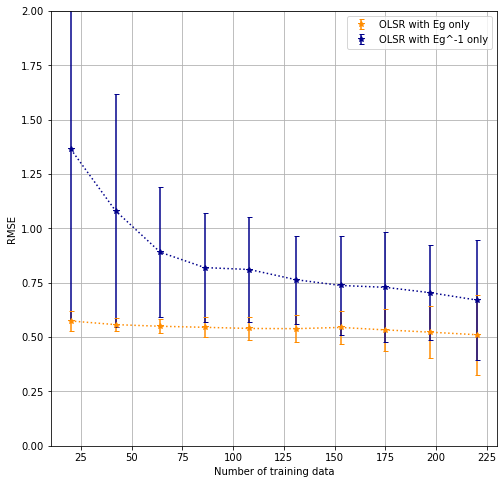

--- 4.834136009216309 seconds ---


In [61]:
model_LR = make_pipeline(StandardScaler(), LinearRegression())
shuffle_size = 300
train_set_size = np.linspace(20,220,10,dtype=int)
RMSE1 = np.zeros((train_set_size.shape[0],shuffle_size))
RMSE2 = np.zeros((train_set_size.shape[0],shuffle_size))
start_time = time.time()

for i in range(train_set_size.shape[0]):
    for p in range(shuffle_size):
        size=(235-train_set_size[i])/235
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =size)
        model_LR.fit(X_train.to_numpy().reshape(-1,1),y_train)
        prediction = model_LR.predict(X_test.to_numpy().reshape(-1,1))
        MSE1 = mean_squared_error(y_test, prediction)
        RMSE1[i,p] = math.sqrt(MSE1)
        model_LR.fit(X_train.to_numpy().reshape(-1,1)**-1,y_train)
        prediction = model_LR.predict(X_test.to_numpy().reshape(-1,1)**-1)
        MSE2 = mean_squared_error(y_test, prediction)
        RMSE2[i,p] = math.sqrt(MSE2)

        
RMSE_AVG1 = np.mean(RMSE1,axis=1)
RMSE_AVG2 = np.mean(RMSE2,axis=1)

RMSE_STD1 = np.std(RMSE1,axis=1)
RMSE_STD2 = np.std(RMSE2,axis=1)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(train_set_size,RMSE_AVG1,fmt='*', color='darkorange', yerr=RMSE_STD1, 
             capsize=2.5, ecolor='darkorange', label= 'OLSR with Eg only')
ax.errorbar(train_set_size,RMSE_AVG2,fmt='*', color='darkblue', yerr=RMSE_STD2, 
             capsize=2.5, ecolor='darkblue', label= 'OLSR with Eg^-1 only')

ax.plot(train_set_size, RMSE_AVG1, ':', c='darkorange')
ax.plot(train_set_size, RMSE_AVG2, ':', c='darkblue')
ax.set_ylabel('RMSE')    
ax.set_xlabel('Number of training data')    
ax.legend(loc='best')
ax.grid()
ax.set_ylim(0,2)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))


Using linear model for prediction of $n_r$:
- it is better to use $\Delta$ rather that $\Delta^{-1}$

In [115]:
to_drop=['Refractive_index_n']
material_clean = materials[materials["Band_Gap(ev)"].notna()]
material_clean = material_clean[material_clean["Refractive_index_n"].notna()]
X = material_clean.drop(to_drop, axis=1)
X = X.fillna(X.mean())
y = material_clean['Refractive_index_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.8,random_state=0)

y_train.describe()

count    47.000000
mean      2.434415
std       0.756840
min       1.391200
25%       1.933500
50%       2.262000
75%       3.012900
max       4.255900
Name: Refractive_index_n, dtype: float64

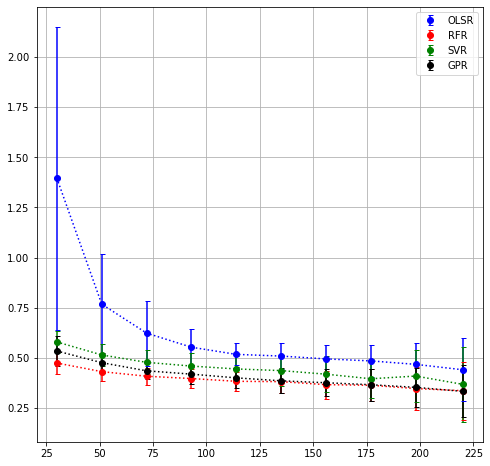

--- 511.1097640991211 seconds ---


In [123]:
model_LR = make_pipeline(StandardScaler(), LinearRegression())
model_RF = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=35))
model_SVR = make_pipeline(StandardScaler(), svm.SVR(kernel='rbf'))

kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3)) 
model_GP = make_pipeline(StandardScaler(), gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, 
                                                                       alpha=0.1))


shuffle_size = 300
train_set_size = np.linspace(30,220,10,dtype=int)
RMSE = np.zeros((4,train_set_size.shape[0],shuffle_size))
start_time = time.time()
fig, ax = plt.subplots(1,1,figsize=(8,8))
colors = ['blue','red','green','black']
labels = ['OLSR','RFR','SVR','GPR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =size,random_state=0)

for i in range(train_set_size.shape[0]):
    size=(235-train_set_size[i])/235
    for j in range(4):
        for p in range(shuffle_size):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =size)
            if j==0:
                model_LR.fit(X_train,y_train)
                prediction = model_LR.predict(X_test)
                MSE = mean_squared_error(y_test, prediction)
                RMSE[j,i,p] = math.sqrt(MSE)

            if j==1:
                model_RF.fit(X_train,y_train)
                prediction = model_RF.predict(X_test)
                MSE = mean_squared_error(y_test, prediction)
                RMSE[j,i,p] = math.sqrt(MSE)

            if j==2:
                model_SVR.fit(X_train,y_train)
                prediction = model_SVR.predict(X_test)
                MSE = mean_squared_error(y_test, prediction)
                RMSE[j,i,p] = math.sqrt(MSE)
            if j==3:
                model_GP.fit(X_train,y_train)
                prediction = model_GP.predict(X_test)
                MSE = mean_squared_error(y_test, prediction)
                RMSE[j,i,p] = math.sqrt(MSE)

        

    
RMSE_AVG = np.mean(RMSE,axis=2)
RMSE_STD = np.std(RMSE,axis=2)
    
for j in range(4):
    ax.errorbar(train_set_size,RMSE_AVG[j,:],fmt='o', color=colors[j], yerr=RMSE_STD[j,:],capsize=2.5, ecolor=colors[j], 
                    label= labels[j])
    ax.plot(train_set_size, RMSE_AVG[j,:], ':', c=colors[j])

ax.legend(loc='best')
ax.grid()
#ax.set_ylim(0,2)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))


In [59]:
model_LR = make_pipeline(StandardScaler(), LinearRegression())
size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =size)
scores = cross_val_score(model_LR, X_train.to_numpy().reshape(-1,1), y_train, cv=10
                         ,scoring = 'neg_mean_squared_error')
scores.mean()


-0.555532805853744